In [3]:
%matplotlib inline

import csv
import glob
import re
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import tarfile
import os
import numpy as np
import math
import glob
import sys

sns.set_style('whitegrid')
mpl.rc('text', usetex=True)
sns.set_context("notebook", font_scale=2)

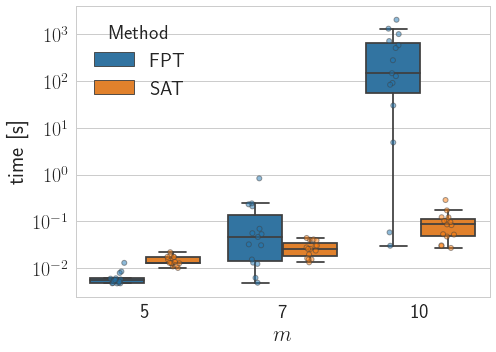

In [42]:
fname = "../data/results/totalruntime_final.txt"

timeData = []
with open(fname, 'r') as input:
    for line in input:
        if not line.startswith('m'):
            data = line.strip().split(' ')
            timeData.append([int(data[0]),int(data[1]),int(data[2]),'FPT',float(data[3])])
            timeData.append([int(data[0]),int(data[1]),int(data[2]),'SAT',float(data[4])])
            
df_time = pd.DataFrame(timeData, columns = ['m', 'kappa', 'case#', 'Method', 'time'])

sns.boxplot(data=df_time,x="m",hue="Method", y="time", hue_order=["FPT","SAT"],showfliers=False)
ax = sns.stripplot(data=df_time,x="m",y="time", hue="Method",
              alpha=.5, dodge=True, linewidth=1, jitter=.1)
plt.gca().set_yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[:2],labels[:2], title="Method")
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
plt.gca().set_xlabel("$m$")
plt.gca().set_ylabel("time [s]")
plt.gcf().set_size_inches(7, 5)
plt.tight_layout()
plt.savefig("runTime_epi_error_25perc.pdf")

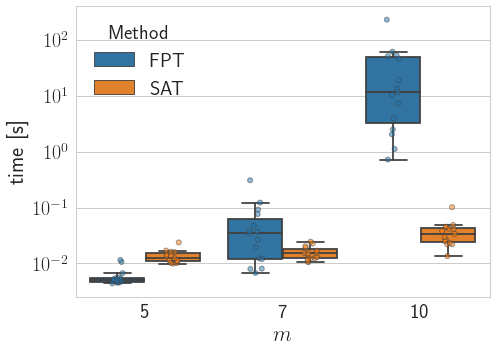

In [43]:
fname = "../data/simulationResults/totalruntime.txt"

timeData = []
with open(fname, 'r') as input:
    for line in input:
        if not line.startswith('m'):
            data = line.strip().split(' ')
            timeData.append([int(data[0]),int(data[1]),int(data[2]),'FPT',float(data[3])])
            timeData.append([int(data[0]),int(data[1]),int(data[2]),'SAT',float(data[4])])
            
df_time = pd.DataFrame(timeData, columns = ['m', 'kappa', 'case#', 'Method', 'time'])

sns.boxplot(data=df_time,x="m",hue="Method", y="time", hue_order=["FPT","SAT"],showfliers=False)
ax = sns.stripplot(data=df_time,x="m",y="time", hue="Method",
              alpha=.5, dodge=True, linewidth=1, jitter=.1)
plt.gca().set_yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[:2],labels[:2], title="Method")
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
plt.gca().set_xlabel("$m$")
plt.gca().set_ylabel("time [s]")
plt.gcf().set_size_inches(7, 5)
plt.tight_layout()
plt.savefig("runTime_epi_error_10perc.pdf")

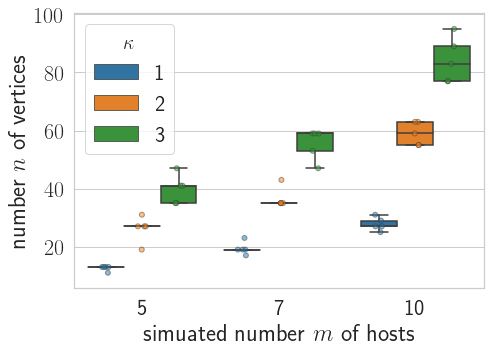

In [186]:
df_phyloscaling = pd.read_csv("../data/simulationResults/phyloscaling.txt", delim_whitespace=True)

sns.boxplot(data=df_phyloscaling,x="m",hue="kappa", y="n", hue_order=[1,2,3],showfliers=False)
ax = sns.stripplot(data=df_phyloscaling,x="m",y="n", hue="kappa",
              alpha=.5, dodge=True, linewidth=1, jitter=.1)
#plt.gca().set_yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[:3],labels[:3], title="$\kappa$")
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
plt.gca().set_xlabel("simuated number $m$ of hosts")
plt.gca().set_ylabel("number $n$ of vertices")
plt.gcf().set_size_inches(7, 5)
plt.tight_layout()
plt.savefig("phyloscaling.pdf")

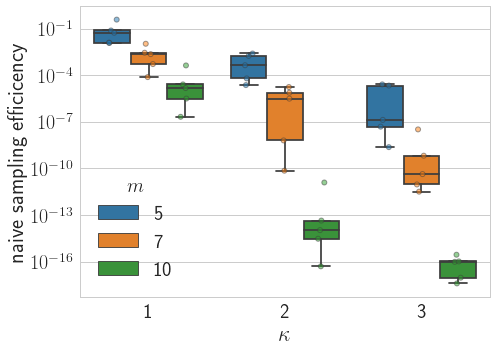

In [57]:
df_counting = pd.read_csv("../data/countingResults/enumerateAll.txt", delim_whitespace=True)

df_counting['ratio'] = df_counting['nTAURUS'] / df_counting['nContact']

sns.boxplot(data=df_counting,x="kappa",hue="m", hue_order=[5,7,10], y="ratio",showfliers=False)
ax = sns.stripplot(data=df_counting,x="kappa",y="ratio", hue="m", hue_order=[5,7,10],
              alpha=.5, dodge=True, linewidth=1, jitter=.1)
plt.gca().set_yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[:3],labels[:3], title="$m$")
plt.gca().set_xlabel("$\kappa$")
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
plt.gca().set_ylabel("naive sampling efficicency")
plt.gcf().set_size_inches(7, 5)
plt.tight_layout()
plt.savefig("naive_efficiency.pdf")

In [60]:
threshold = 0.5;
totalLeaves = 0
for fileName in glob.glob("../data/HCV/HOC/*.fas"):
    with open(fileName,'r') as input:
        copyList = []
        cumCopyList = []
        totalCopies = 0
        for line in input:

            if line.startswith('>'):
                data = line.strip().split('_')
                ncopies = int(data[-1])
                copyList.append(ncopies)
                totalCopies += ncopies
                cumCopyList.append(totalCopies)
    
    #print("total copies is ", totalCopies)
    
    thresholdCopies = threshold*totalCopies
    for i in range(len(cumCopyList)):
        if cumCopyList[i] >= thresholdCopies:
            break

    nLeaves = i + 1
    print("Number of samples for " + fileName + " is " + str(nLeaves))

Number of samples for ../data/HCV/HOC/HOC01_1b.fas is 1
Number of samples for ../data/HCV/HOC/HOC02_1b.fas is 5
Number of samples for ../data/HCV/HOC/HOC04_1b.fas is 9
Number of samples for ../data/HCV/HOC/HOC07_1b.fas is 1
Number of samples for ../data/HCV/HOC/HOC08_1b.fas is 1
Number of samples for ../data/HCV/HOC/HOC09_1b.fas is 1
Number of samples for ../data/HCV/HOC/HOC10_1b.fas is 16
Number of samples for ../data/HCV/HOC/HOC12_1b.fas is 1
Number of samples for ../data/HCV/HOC/HOC13_1b.fas is 4
Number of samples for ../data/HCV/HOC/HOC16_1b.fas is 1
Number of samples for ../data/HCV/HOC/HOC18_1b.fas is 14
Number of samples for ../data/HCV/HOC/HOC20_1b.fas is 1
Number of samples for ../data/HCV/HOC/HOC21_1b.fas is 6
Number of samples for ../data/HCV/HOC/HOC22_1b.fas is 6
Number of samples for ../data/HCV/HOC/HOC27_1b.fas is 11
Number of samples for ../data/HCV/HOC/HOC28_1b.fas is 1
Number of samples for ../data/HCV/HOC/HOC34_1b.fas is 4
Number of samples for ../data/HCV/HOC/HOC35_1

In [61]:
import glob, os
import numpy as np

totalLeavesList = []
for threshold in np.linspace(0,1,11):

    totalLeaves = 0
    for fileName in glob.glob("../data/HCV/HOC/*.fas"):
        with open(fileName,'r') as input:
            copyList = []
            cumCopyList = []
            totalCopies = 0
            for line in input:

                if line.startswith('>'):
                    data = line.strip().split('_')
                    ncopies = int(data[-1])
                    copyList.append(ncopies)
                    totalCopies += ncopies
                    cumCopyList.append(totalCopies)

        thresholdCopies = threshold*totalCopies
        for i in range(len(cumCopyList)):
            if cumCopyList[i] >= thresholdCopies:
                break

        nLeaves = i + 1
        #print("Number of samples for " + fileName + " is " + str(nLeaves))

        totalLeaves += nLeaves
    #print("total number of leaves will be: " + str(totalLeaves))
    
    totalLeavesList.append(totalLeaves)
    print("total number of leaves for threshold ",round(threshold,2)," is ",(totalLeaves))

total number of leaves for threshold  0.0  is  18
total number of leaves for threshold  0.1  is  18
total number of leaves for threshold  0.2  is  18
total number of leaves for threshold  0.3  is  24
total number of leaves for threshold  0.4  is  40
total number of leaves for threshold  0.5  is  84
total number of leaves for threshold  0.6  is  358
total number of leaves for threshold  0.7  is  1201
total number of leaves for threshold  0.8  is  3029
total number of leaves for threshold  0.9  is  8985
total number of leaves for threshold  1.0  is  23512


In [90]:
# we choose a threshold of 0.5

threshold = 0.5

for fileName in glob.glob("../data/HCV/HOC/*.fas"):
    with open(fileName,'r') as input:
        copyList = []
        cumCopyList = []
        totalCopies = 0
        for line in input:

            if line.startswith('>'):
                data = line.strip().split('_')
                ncopies = int(data[-1])
                copyList.append(ncopies)
                totalCopies += ncopies
                cumCopyList.append(totalCopies)

    thresholdCopies = threshold*totalCopies
    for i in range(len(cumCopyList)):
        if cumCopyList[i] >= thresholdCopies:
            break
            
    nLeaves = i + 1

    print('number of leaves for ', fileName, ' is ',nLeaves)
    
    newFileName = fileName + '.pruned'
    
    newFile = open(newFileName, 'w')

    counter = 0
    with open(fileName, 'r') as input:
        for line in input:                
            if line.startswith('>'):
                counter += 1

            if counter <= nLeaves:
                newFile.write(line)
            else:
                break
    newFile.close()

number of leaves for  ../data/HCV/HOC/HOC01_1b.fas  is  1
number of leaves for  ../data/HCV/HOC/HOC02_1b.fas  is  5
number of leaves for  ../data/HCV/HOC/HOC04_1b.fas  is  9
number of leaves for  ../data/HCV/HOC/HOC07_1b.fas  is  1
number of leaves for  ../data/HCV/HOC/HOC08_1b.fas  is  1
number of leaves for  ../data/HCV/HOC/HOC09_1b.fas  is  1
number of leaves for  ../data/HCV/HOC/HOC10_1b.fas  is  16
number of leaves for  ../data/HCV/HOC/HOC12_1b.fas  is  1
number of leaves for  ../data/HCV/HOC/HOC13_1b.fas  is  4
number of leaves for  ../data/HCV/HOC/HOC16_1b.fas  is  1
number of leaves for  ../data/HCV/HOC/HOC18_1b.fas  is  14
number of leaves for  ../data/HCV/HOC/HOC20_1b.fas  is  1
number of leaves for  ../data/HCV/HOC/HOC21_1b.fas  is  6
number of leaves for  ../data/HCV/HOC/HOC22_1b.fas  is  6
number of leaves for  ../data/HCV/HOC/HOC27_1b.fas  is  11
number of leaves for  ../data/HCV/HOC/HOC28_1b.fas  is  1
number of leaves for  ../data/HCV/HOC/HOC34_1b.fas  is  4
number of l

In [5]:
df_runTime = pd.read_csv("../data/results/totalruntime_final.txt", delim_whitespace=True)

df_runTime.head()

,m,kappa,case#,FPT,SAT
0,5,1,1,0.008566,0.015302
1,5,1,2,0.004761,0.010180
2,5,1,3,0.006017,0.010970
3,5,1,4,0.004783,0.011467
4,5,1,5,0.004858,0.012565


In [146]:
df_titus = pd.read_csv("../data/hivResults/summary_MCC_inf.out", delim_whitespace=True)
df_titus["normCommonEdges"] = df_titus["numCommonEdges"].apply(lambda x : x / 10.)
df_titus.head()

,solIdx,transmissions,maxBottleneckSize,unsampledLineages,unsampledStrains,numCommonEdges,normCommonEdges
0,0,45,15,2,35,7,0.7
1,1,37,11,0,29,9,0.9
2,2,50,13,3,39,6,0.6
3,3,49,14,2,39,7,0.7
4,4,43,10,3,32,6,0.6


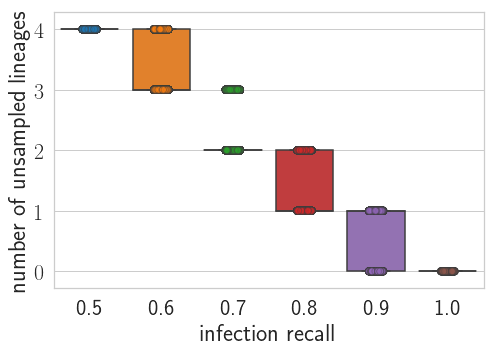

In [185]:
sns.boxplot(data=df_titus,x="normCommonEdges", y="unsampledLineages",showfliers=False)
ax = sns.stripplot(data=df_titus, x="normCommonEdges", y="unsampledLineages", 
                   alpha=.5, dodge=True, linewidth=1, jitter=.1, size=7)
handles, labels = plt.gca().get_legend_handles_labels()
#plt.gca().legend(handles[:3],labels[:3], title="$m$")
plt.gca().set_xlabel("infection recall")
#plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
plt.gca().set_ylabel("number of unsampled lineages")
plt.gcf().set_size_inches(7, 5)
plt.tight_layout()
plt.savefig("hiv_lineages_vs_recall.png")

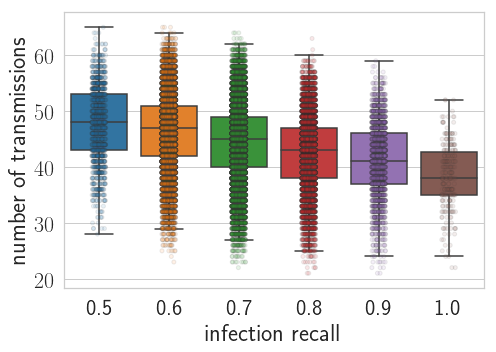

In [184]:
sns.boxplot(data=df_titus,x="normCommonEdges", y="transmissions",showfliers=False)
ax = sns.stripplot(data=df_titus, x="normCommonEdges", y="transmissions", 
                   alpha=.1, dodge=True, linewidth=1, jitter=.1, size=4)
#ax = sns.stripplot(data=df_titus,x="kappa",y="ratio",
#              alpha=.5, dodge=True, linewidth=1, jitter=.1)
#plt.gca().set_yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
#plt.gca().legend(handles[:3],labels[:3], title="$m$")
plt.gca().set_xlabel("infection recall")
#plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
plt.gca().set_ylabel("number of transmissions")
plt.gcf().set_size_inches(7, 5)
plt.tight_layout()
plt.savefig("hiv_transmissions_vs_recall.png")

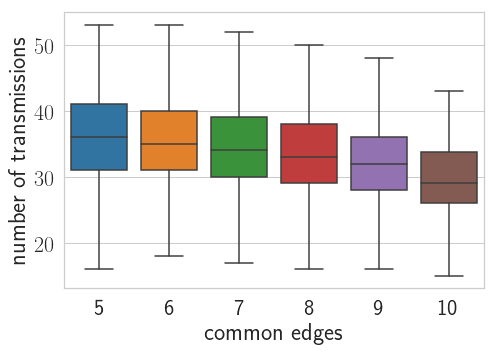

In [6]:
sns.boxplot(data=df_titus,x="numCommonEdges", y="unsampledStrains",showfliers=False)
#ax = sns.stripplot(data=df_titus,x="kappa",y="ratio",
#              alpha=.5, dodge=True, linewidth=1, jitter=.1)
#plt.gca().set_yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
#plt.gca().legend(handles[:3],labels[:3], title="$m$")
plt.gca().set_xlabel("common edges")
#plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
plt.gca().set_ylabel("number of unsampled strains")
plt.gcf().set_size_inches(7, 5)
plt.tight_layout()

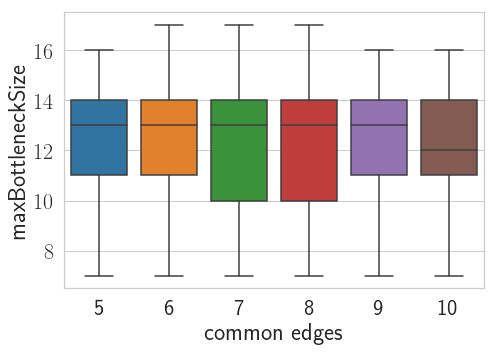

In [7]:
sns.boxplot(data=df_titus,x="numCommonEdges", y="maxBottleneckSize",showfliers=False)
#ax = sns.stripplot(data=df_titus,x="kappa",y="ratio",
#              alpha=.5, dodge=True, linewidth=1, jitter=.1)
#plt.gca().set_yscale("log")
handles, labels = plt.gca().get_legend_handles_labels()
#plt.gca().legend(handles[:3],labels[:3], title="$m$")
plt.gca().set_xlabel("common edges")
#plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
plt.gca().set_ylabel("maxBottleneckSize")
plt.gcf().set_size_inches(7, 5)
plt.tight_layout()

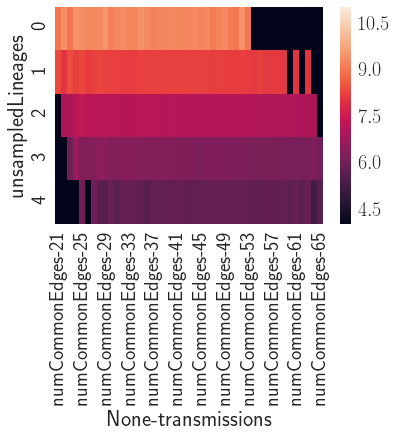

In [53]:
df_heat=df_titus.groupby(["unsampledLineages","transmissions"])["numCommonEdges"].mean().to_frame().reset_index()
df_pivot = pd.pivot_table(df_heat, index=["unsampledLineages"], columns=["transmissions"]).fillna(4)
sns.heatmap(df_pivot, vmin=4, vmax=11)#, cmap=sns.color_palette()[:50])

In [175]:
df_titus.head()

,solIdx,transmissions,maxBottleneckSize,unsampledLineages,unsampledStrains,numCommonEdges,normCommonEdges
0,0,45,15,2,35,7,0.7
1,1,37,11,0,29,9,0.9
2,2,50,13,3,39,6,0.6
3,3,49,14,2,39,7,0.7
4,4,43,10,3,32,6,0.6


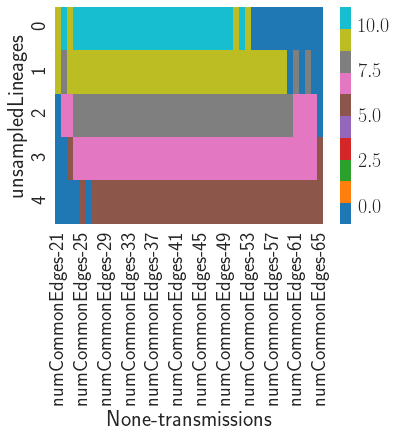

In [48]:
df_heat=df_titus.groupby(["unsampledLineages","transmissions"])["numCommonEdges"].max().to_frame().reset_index()
df_pivot = pd.pivot_table(df_heat, index=["unsampledLineages"], columns=["transmissions"]).fillna(-1)
sns.heatmap(df_pivot, vmin=-1.05, vmax=11, cmap=sns.color_palette()[:20])

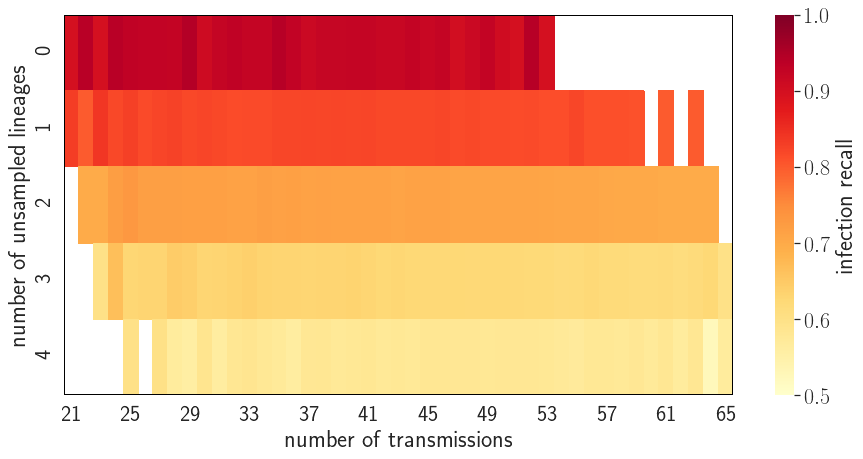

In [178]:
df_heat=df_titus.groupby(["unsampledLineages","transmissions"])["normCommonEdges"].mean().to_frame().reset_index()
df_pivot = pd.pivot_table(df_heat, index=["unsampledLineages"], columns=["transmissions"], 
                          values=["normCommonEdges"])
df_pivot.columns = range(21,66)
ax = sns.heatmap(df_pivot, vmin=0.5, vmax=1, cmap="YlOrRd", cbar_kws={'label': 'infection recall'})
# ax.grid(linestyle='-', linewidth='0.5', color='black')
plt.gcf().set_size_inches(15, 7)
ax.axhline(y=0, color='k',linewidth=2);
ax.axhline(y=5, color='k',linewidth=2);
ax.axvline(x=0, color='k',linewidth=2);
ax.axvline(x=45, color='k',linewidth=2);
plt.gca().set_ylabel("number of unsampled lineages");
plt.gca().set_xlabel("number of transmissions");
plt.savefig("hiv_lineages_transmissions_recall_heatmap.pdf")

In [42]:
df_pivot

numCommonEdges                                               \
transmissions                 21   22   23   24   25   26   27   28   29   30   
unsampledLineages                                                               
0                            9.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0   
1                            8.0  8.0  8.0  8.0  8.0  8.0  8.0  8.0  8.0  8.0   
2                           -1.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0   
3                           -1.0 -1.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0   
4                           -1.0 -1.0 -1.0 -1.0  6.0 -1.0  6.0  5.0  5.0  5.0   

                  ...                                                     
transmissions     ...    56   57   58   59   60   61   62   63   64   65  
unsampledLineages ...                                                     
0                 ...  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
1                 ...   8.0  8.0  8.0  8.0 -1.0  8.0 -1.0  8.0 -1.0 -1.0  
2                 ...   7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0 -1.0  
3                 ...   6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  
4                 ...   5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  

[5 rows x 45 columns]

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

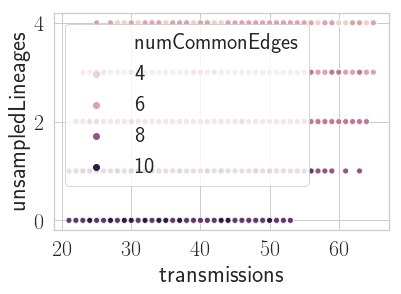

In [11]:
ax = sns.scatterplot(x="transmissions", y="unsampledLineages", hue="numCommonEdges", y_jitter=0.1, data=df_titus)

In [123]:
df_plot_alpha["index"].values

array([0., 1., 2., 3., 4., 5., 6.])

In [124]:
df_plot_alpha["commonEdges"].values

array([9, 9, 9, 8, 8, 8, 6])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


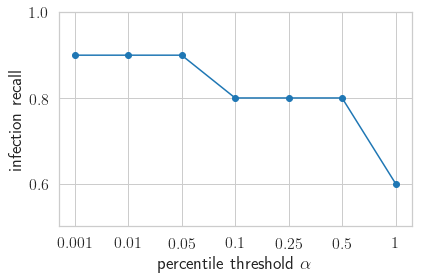

In [210]:
contactSet = set()
with open("../data/HIV/hiv_MCC_contact.out", 'r') as input:
    for line in input:
        data = line.strip().split(' ')
        contactSet.add(tuple(data))
    assert(len(contactSet) == 10)

alphaSweepResults = []    
for fileName in glob.glob("../data/tempHIVresults/new_concensus_*.out"):
    consensus = set()
    with open(fileName,'r') as input:
        for line in input:
            data = line.strip().split('\t')
            consensus.add(tuple(data[:-1]))
        assert(len(consensus) == 10)  
        
    fileID = fileName.strip().split('_')[-1].strip().split('.out')[0]
    alphaSweepResults.append([float(fileID), len(contactSet.intersection(consensus))])
    
df_alpha = pd.DataFrame(alphaSweepResults, columns = ['alpha', 'commonEdges'])
df_alpha["normCommonEdges"] = df_alpha["commonEdges"].apply(lambda x : x / 10.)

df_plot_alpha = df_alpha[df_alpha["alpha"].isin([0.001,0.01,0.05,0.1,0.25,0.5,1])]
df_plot_alpha["index"] = np.linspace(0,len(df_plot_alpha)-1,len(df_plot_alpha))

plt.plot(list(df_plot_alpha["index"].values), list(df_plot_alpha["normCommonEdges"].values), '-o')
plt.gcf().set_size_inches(6, 4)
plt.xticks(range(7),['$0.001$', '$0.01$', '$0.05$', '$0.1$', '$0.25$', '$0.5$', '$1$']);
#plt.yticks(range(6),['0.5', '0.6', '0.7', '0.8', '0.9', '1']);
#plt.gca().set_xlabel('percentile')
#plt.gca().set_ylabel('infection recall')
plt.gca().set_ylim([0.5, 1]);
plt.xlabel('percentile threshold $\\alpha$', fontsize=18);
plt.ylabel('infection recall', fontsize=18);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.tight_layout()
plt.savefig("hiv_consensus_recall_vs_percentile.pdf")

In [173]:
df_alpha

,alpha,commonEdges,normCommonEdges
0,0.001,9,0.9
1,0.002,9,0.9
2,0.003,9,0.9
3,0.004,9,0.9
4,0.005,9,0.9
5,0.006,9,0.9
6,0.007,9,0.9
7,0.008,9,0.9
8,0.009,9,0.9
9,0.010,9,0.9


'/Users/aero_user/Desktop/TAURUS/scripts'